In [1]:
## BINARY CLASSIFICATION USING VGG16(African and Asian elephants)

In [3]:
##In this file we are going to develop a binary model using transfer learning technique pretrained model called vgg16

In [4]:
## importing packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt

(183, 275, 3)
(256, 256, 3)


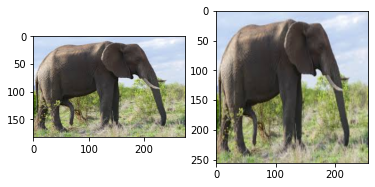

In [7]:
import cv2

image_1=cv2.imread('/content/drive/MyDrive/archive/dataset/test/African/af_te1.jpg')
## original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

## resizing the image

image_resize=cv2.resize(image_1,((256,256)))

print(image_resize.shape)

plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [16]:
train_data_path = '/content/drive/MyDrive/archive/dataset/train'
test_data_path='/content/drive/MyDrive/archive/dataset/test'

In [17]:
## Making images linear format using tensorflow ImageDataGenerator

In [18]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
preprocess_train = ImageDataGenerator(rescale = 1. / 255 , 
                                      shear_range = 0.2 , 
                                      zoom_range = 0.4,
                                      vertical_flip = True,
                                      horizontal_flip = True)


preprocess_test = ImageDataGenerator(rescale = 1./255)



In [20]:
##collecting each image from train and test folder:

In [23]:
labels = ['African','Asian']

In [24]:
train_data = preprocess_train.flow_from_directory(train_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 840 images belonging to 2 classes.


In [25]:
test_data = preprocess_test.flow_from_directory(test_data_path , target_size=[256,256] , class_mode = 'binary' ,classes = labels , batch_size = 32)

Found 188 images belonging to 2 classes.


In [26]:
##Now I am not developing my own custom model so I am taking a copy of vgg16 Architecture

In [27]:
from tensorflow.keras.applications.vgg16 import VGG16

In [31]:
##making image size
image_size = [256,256]

In [32]:
sol = VGG16(input_shape = image_size + [3] , weights='imagenet' , include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [34]:
# to make not to update weights of vgg16:

for i in sol.layers:
  i.trainable = False

In [35]:
from tensorflow.keras.layers import Flatten

In [36]:
# developing my own output layer:

y = Flatten()(sol.output)

In [37]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid


In [38]:
from keras.api._v2.keras import activations
final = Dense(1 ,activation = 'sigmoid')(y)

In [39]:
from tensorflow.keras.models import Model

In [40]:
vgg16_model = Model(sol.inputs , final)

In [41]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [42]:
vgg16_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])

In [43]:
vgg16_model.fit(train_data , epochs = 30)

Epoch 1/30
27/27 [==============================] - 181s 6s/step - loss: 0.8279 - Accuracy: 0.5369
Epoch 2/30
27/27 [==============================] - 15s 535ms/step - loss: 0.7112 - Accuracy: 0.6179
Epoch 3/30
27/27 [==============================] - 15s 549ms/step - loss: 0.6226 - Accuracy: 0.6524
Epoch 4/30
27/27 [==============================] - 15s 535ms/step - loss: 0.6037 - Accuracy: 0.6929
Epoch 5/30
27/27 [==============================] - 15s 540ms/step - loss: 0.5734 - Accuracy: 0.7000
Epoch 6/30
27/27 [==============================] - 15s 536ms/step - loss: 0.6003 - Accuracy: 0.6833
Epoch 7/30
27/27 [==============================] - 15s 540ms/step - loss: 0.6815 - Accuracy: 0.6440
Epoch 8/30
27/27 [==============================] - 14s 533ms/step - loss: 0.5303 - Accuracy: 0.7226
Epoch 9/30
27/27 [==============================] - 15s 536ms/step - loss: 0.5592 - Accuracy: 0.7238
Epoch 10/30
27/27 [==============================] - 15s 547ms/step - loss: 0.5591 - Accuracy

In [45]:
vgg16_model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [49]:
vgg16_model.history.history['loss']

[0.8279094099998474,
 0.7111542224884033,
 0.6225847005844116,
 0.603654682636261,
 0.5733849406242371,
 0.6002574563026428,
 0.6815445423126221,
 0.5302772521972656,
 0.5592171549797058,
 0.5591409802436829,
 0.5331785678863525,
 0.5165249109268188,
 0.5644669532775879,
 0.5354690551757812,
 0.5144959688186646,
 0.4885253608226776,
 0.5079838037490845,
 0.4423850178718567,
 0.4744664132595062,
 0.49337807297706604,
 0.4427226185798645,
 0.4361686408519745,
 0.4265688359737396,
 0.4348828196525574,
 0.41627824306488037,
 0.5741961002349854,
 0.48940181732177734,
 0.4895156919956207,
 0.4520570933818817,
 0.4205607771873474]

In [50]:
vgg16_model.history.history['Accuracy']

[0.5369047522544861,
 0.6178571581840515,
 0.6523809432983398,
 0.6928571462631226,
 0.699999988079071,
 0.6833333373069763,
 0.6440476179122925,
 0.7226190567016602,
 0.723809540271759,
 0.7047619223594666,
 0.7083333134651184,
 0.7523809671401978,
 0.7321428656578064,
 0.723809540271759,
 0.75,
 0.7535714507102966,
 0.7547619342803955,
 0.7892857193946838,
 0.7809523940086365,
 0.7630952596664429,
 0.7869047522544861,
 0.8071428537368774,
 0.8071428537368774,
 0.788095235824585,
 0.7940475940704346,
 0.738095223903656,
 0.7583333253860474,
 0.7595238089561462,
 0.7833333611488342,
 0.800000011920929]

In [51]:
## plotting between training_loss and training_accuracy

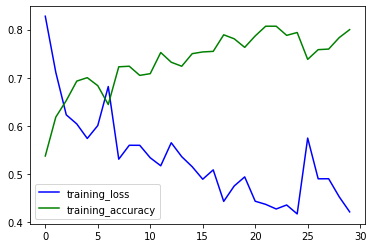

In [53]:
plt.plot(np.arange(30), vgg16_model.history.history['loss'],color='b',label='training_loss')
plt.plot(np.arange(30),vgg16_model.history.history['Accuracy'],color='g',label='training_accuracy')
plt.legend(loc=0)
plt.show()

In [54]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
y_test_pred = vgg16_model.predict(test_data)

6/6 [==============================] - 44s 9s/step


In [56]:
y_test_pred

array([[0.921574  ],
       [0.96768785],
       [0.96487236],
       [0.9930269 ],
       [0.9471998 ],
       [0.5296888 ],
       [0.05365208],
       [0.91591877],
       [0.988165  ],
       [0.7414271 ],
       [0.02726614],
       [0.506372  ],
       [0.9841558 ],
       [0.7389562 ],
       [0.44508833],
       [0.9380756 ],
       [0.1116979 ],
       [0.46916005],
       [0.91370124],
       [0.9188642 ],
       [0.986347  ],
       [0.9918447 ],
       [0.9896521 ],
       [0.15661897],
       [0.6699019 ],
       [0.06230108],
       [0.45932257],
       [0.3049932 ],
       [0.9449996 ],
       [0.94937336],
       [0.95281595],
       [0.7558329 ],
       [0.06308161],
       [0.87383324],
       [0.08746648],
       [0.46916005],
       [0.96873456],
       [0.13234928],
       [0.9734105 ],
       [0.38443044],
       [0.9561789 ],
       [0.99266607],
       [0.7781916 ],
       [0.99098223],
       [0.74488336],
       [0.81066614],
       [0.02880846],
       [0.992

In [57]:
c = []

for i in y_test_pred:
  if i > 0.5:
    c.append(1)
  else:
    c.append(0)

In [58]:
c

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [59]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [60]:
accuracy_score(test_data.classes , c)

0.5638297872340425

In [61]:
confusion_matrix(test_data.classes , c)

array([[30, 67],
       [15, 76]])

In [62]:
print(classification_report(test_data.classes , c))

              precision    recall  f1-score   support

           0       0.67      0.31      0.42        97
           1       0.53      0.84      0.65        91

    accuracy                           0.56       188
   macro avg       0.60      0.57      0.54       188
weighted avg       0.60      0.56      0.53       188



In [63]:
## checking with own data

In [64]:
def predictions(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg16_model.predict(image)
  print(result)
  if result > 0.5:
    print('Asian')
  else:
    print('African')
  img = plt.imread(path)
  plt.imshow(img)

(1, 256, 256, 3)
1/1 [==============================] - 1s 956ms/step
[[0.40789184]]
African


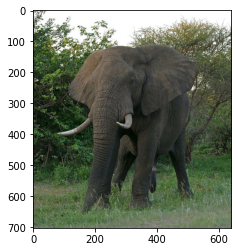

In [65]:
predictions('/content/640px-African_Elephant_(Loxodonta_africana)_male_(17289351322) (1).jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
[[0.986697]]
Asian


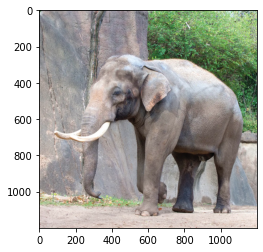

In [66]:
predictions('/content/asian-elephant-02-01 (2).webp')

(1, 256, 256, 3)
1/1 [==============================] - 0s 22ms/step
[[0.7228763]]
Asian


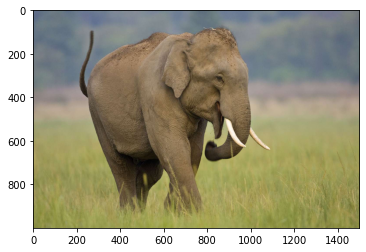

In [68]:
predictions('/content/167003501-56a0089e5f9b58eba4ae8f93.jpg')